# Kelompok 6 - Kelas D (Fast Food Nutrition)
1. Muhammad Naufal Izzudin (24060122120018)
2. Tiara Putri Wibowo (24060122120026)
3. Fendi Ardianto (24060122130077)
4. Farrel Ardana Jati (24060122140165)

# 1: Persiapan

## 1.1: Import Library

In [49]:
# data
import pandas as pd
import numpy as np

# visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# clustering
from sklearn.cluster import KMeans

# metriks
from sklearn.metrics import silhouette_score

# pca
from sklearn.decomposition import PCA

# ilangin warning
import warnings
warnings.filterwarnings('ignore')


## 1.2: Import Dataset


In [50]:
df = pd.read_csv("/kaggle/input/fastfood-nutrition/fastfood.csv")

# 2: Lihat Dataset

In [51]:
df

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,Taco Bell,Spicy Triple Double Crunchwrap,780,340,38,10.0,0.5,50,1850,87,9.0,8,23.0,20.0,10.0,25.0,Other
511,Taco Bell,Express Taco Salad w/ Chips,580,260,29,9.0,1.0,60,1270,59,8.0,7,23.0,NaN,NaN,NaN,Other
512,Taco Bell,Fiesta Taco Salad-Beef,780,380,42,10.0,1.0,60,1340,74,11.0,7,26.0,NaN,NaN,NaN,Other
513,Taco Bell,Fiesta Taco Salad-Chicken,720,320,35,7.0,0.0,70,1260,70,8.0,8,32.0,NaN,NaN,NaN,Other


In [52]:
df.sample(10)

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
368,Subway,Autumn Carved Turkey Salad,300,80,9,3.0,0.0,60,1120,26,3.0,22,25.0,40.0,40.0,15.0,Other
122,Sonic,5 Piece Super Crunch Chicken Strip Dinner,1190,510,57,10.0,1.0,90,2610,126,8.0,9,44.0,2.0,8.0,14.0,Other
325,Subway,"6"" Corned Beef Reuben",470,130,15,4.5,0.0,85,1770,45,7.0,12,39.0,10.0,35.0,20.0,Other
267,Dairy Queen,Original Cheeseburger,400,160,18,9.0,1.0,65,930,34,1.0,8,19.0,10.0,0.0,10.0,Other
68,Chick Fil-A,12 piece Chicken Nuggets,390,162,18,1.5,0.0,115,1460,14,2.0,1,41.0,0.0,8.0,4.0,Other
449,Taco Bell,Nacho Cheese Doritos® Locos Tacos,170,80,9,4.0,0.0,25,340,13,2.0,1,8.0,NaN,NaN,NaN,Other
402,Taco Bell,7-Layer Burrito,510,170,19,7.0,0.0,20,1090,68,11.0,4,16.0,NaN,NaN,NaN,Other
340,Subway,"6"" Spicy Italian",480,220,24,9.0,1.0,50,1520,46,5.0,8,20.0,8.0,20.0,30.0,Other
50,Mcdonalds,Premium Asian Salad w/ Crispy Chicken,490,250,28,8.0,0.0,95,1120,28,4.0,4,33.0,180.0,60.0,15.0,Other
477,Taco Bell,Nachos BellGrande®,760,360,39,6.0,0.0,30,1100,82,13.0,5,18.0,NaN,NaN,NaN,Other


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        503 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      514 non-null    float64
 13  vit_a        301 non-null    float64
 14  vit_c        305 non-null    float64
 15  calcium      305 non-null    float64
 16  salad        515 non-null    object 
dtypes: float64(7), int64(7), object(3)
memory usage: 68.5+ KB


In [54]:
df.shape

(515, 17)

In [55]:
df.describe()

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,503.000000,515.000000,514.000000,301.000000,305.000000,305.000000
mean,530.912621,238.813592,26.590291,8.153398,0.465049,72.456311,1246.737864,45.664078,4.137177,7.262136,27.891051,18.857143,20.170492,24.852459
std,282.436147,166.407510,18.411876,6.418811,0.839644,63.160406,689.954278,24.883342,3.037460,6.761301,17.683921,31.384330,30.592243,25.522073
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,330.000000,120.000000,14.000000,4.000000,0.000000,35.000000,800.000000,28.500000,2.000000,3.000000,16.000000,4.000000,4.000000,8.000000
50%,490.000000,210.000000,23.000000,7.000000,0.000000,60.000000,1110.000000,44.000000,3.000000,6.000000,24.500000,10.000000,10.000000,20.000000
75%,690.000000,310.000000,35.000000,11.000000,1.000000,95.000000,1550.000000,57.000000,5.000000,9.000000,36.000000,20.000000,30.000000,30.000000
max,2430.000000,1270.000000,141.000000,47.000000,8.000000,805.000000,6080.000000,156.000000,17.000000,87.000000,186.000000,180.000000,400.000000,290.000000


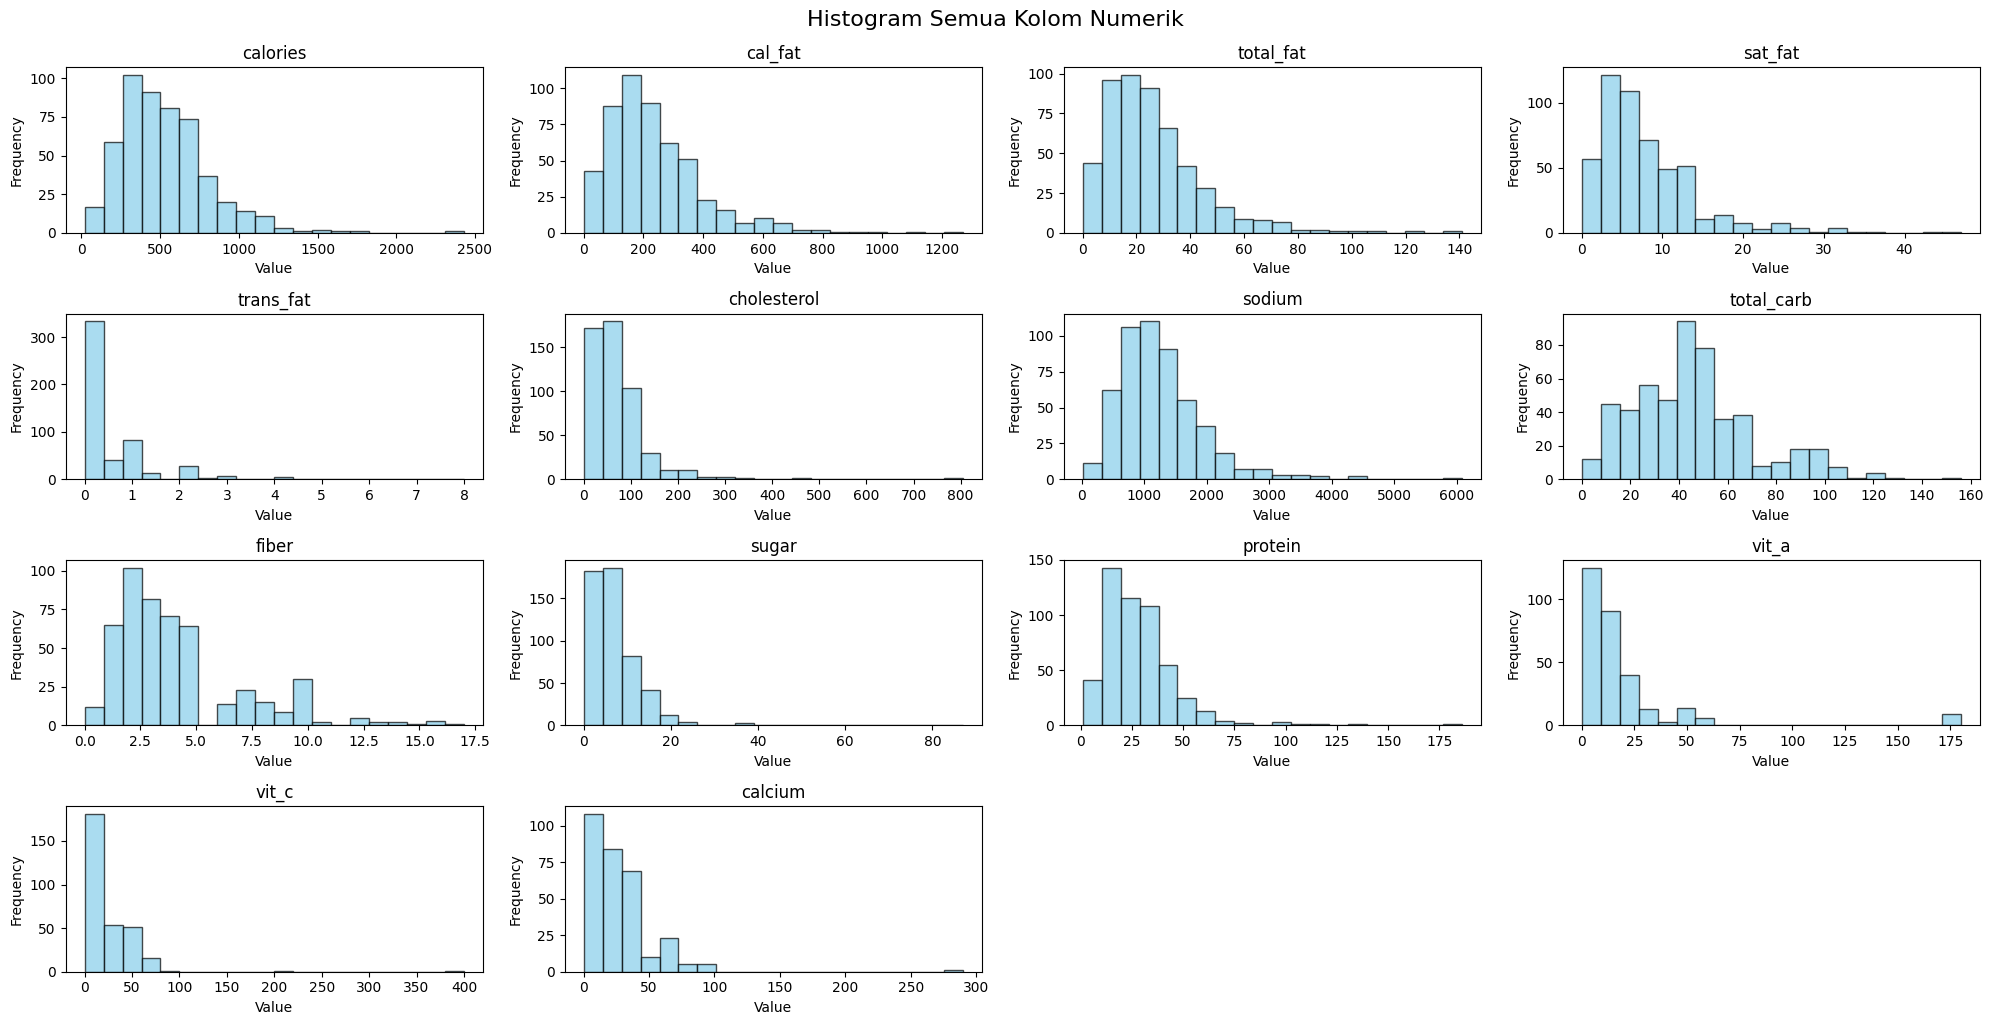

In [56]:
# Kolom numerik yang akan divisualisasikan
numeric_col = ['calories', 'cal_fat', 'total_fat', 'sat_fat', 'trans_fat', 'cholesterol', 'sodium', 
               'total_carb', 'fiber', 'sugar', 'protein', 
               'vit_a', 'vit_c', 'calcium']

# Tentukan jumlah baris dan kolom untuk subplot
n_cols = 4
n_rows = (len(numeric_col) + n_cols - 1) // n_cols  # Hitung jumlah baris berdasarkan jumlah kolom

# Plot histogram untuk setiap kolom
plt.figure(figsize=(20, 10))
for i, col in enumerate(numeric_col, start=1):
    plt.subplot(n_rows, n_cols, i)  # Baris, Kolom, Indeks
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(col, fontsize=12)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

# Atur layout agar rapi
plt.tight_layout()
plt.suptitle('Histogram Semua Kolom Numerik', fontsize=16, y=1.02)
plt.show()


# 3: Preprocessing

## 3.1: MIssing values

In [57]:
# cek banyaknya missing value untuk tiap fitur
df.isnull().sum()


restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64

In [58]:
# jumlah missing value untuk tiap fitur
(df.isna().sum()/len(df))*100

restaurant      0.000000
item            0.000000
calories        0.000000
cal_fat         0.000000
total_fat       0.000000
sat_fat         0.000000
trans_fat       0.000000
cholesterol     0.000000
sodium          0.000000
total_carb      0.000000
fiber           2.330097
sugar           0.000000
protein         0.194175
vit_a          41.553398
vit_c          40.776699
calcium        40.776699
salad           0.000000
dtype: float64

In [59]:
# ganti missing value dengan median dari tiap fitur
# alasan pake median: karena datanya kebanyakan condong ke kiri sehingga yg cocok itu median, kalo pake rata rata ga bisa karena persebaran datanya gak normal dan median lebih tahan thdp outlier drpd mean
# kenapa gak dihapus si vit_c dan a nya, karena fitur itu penting untuk mempertimbangkan makanan tsb sehat atau tidak

null_cols = ['fiber', 'protein', 'vit_a', 'vit_c', 'calcium']
null_cols_avg = {}

for col in null_cols:
    null_cols_avg[col] = df[col].median()

print(null_cols_avg)


{'fiber': 3.0, 'protein': 24.5, 'vit_a': 10.0, 'vit_c': 10.0, 'calcium': 20.0}


In [60]:
# isi nilai yang null
df.fillna(value=null_cols_avg,inplace=True)

# cek lagi banyaknya missing value untuk tiap fitur
df.isnull().sum()

restaurant     0
item           0
calories       0
cal_fat        0
total_fat      0
sat_fat        0
trans_fat      0
cholesterol    0
sodium         0
total_carb     0
fiber          0
sugar          0
protein        0
vit_a          0
vit_c          0
calcium        0
salad          0
dtype: int64

## 3.2: Data duplikat

In [61]:
# cek data yg duplikat
print(df.duplicated().sum())


2


In [62]:
# hapus data yg duplikat
df.drop_duplicates(inplace=True)

# cek lagi data yg duplikat
print(df.duplicated().sum())


0


## 3.3: Cek Outlier

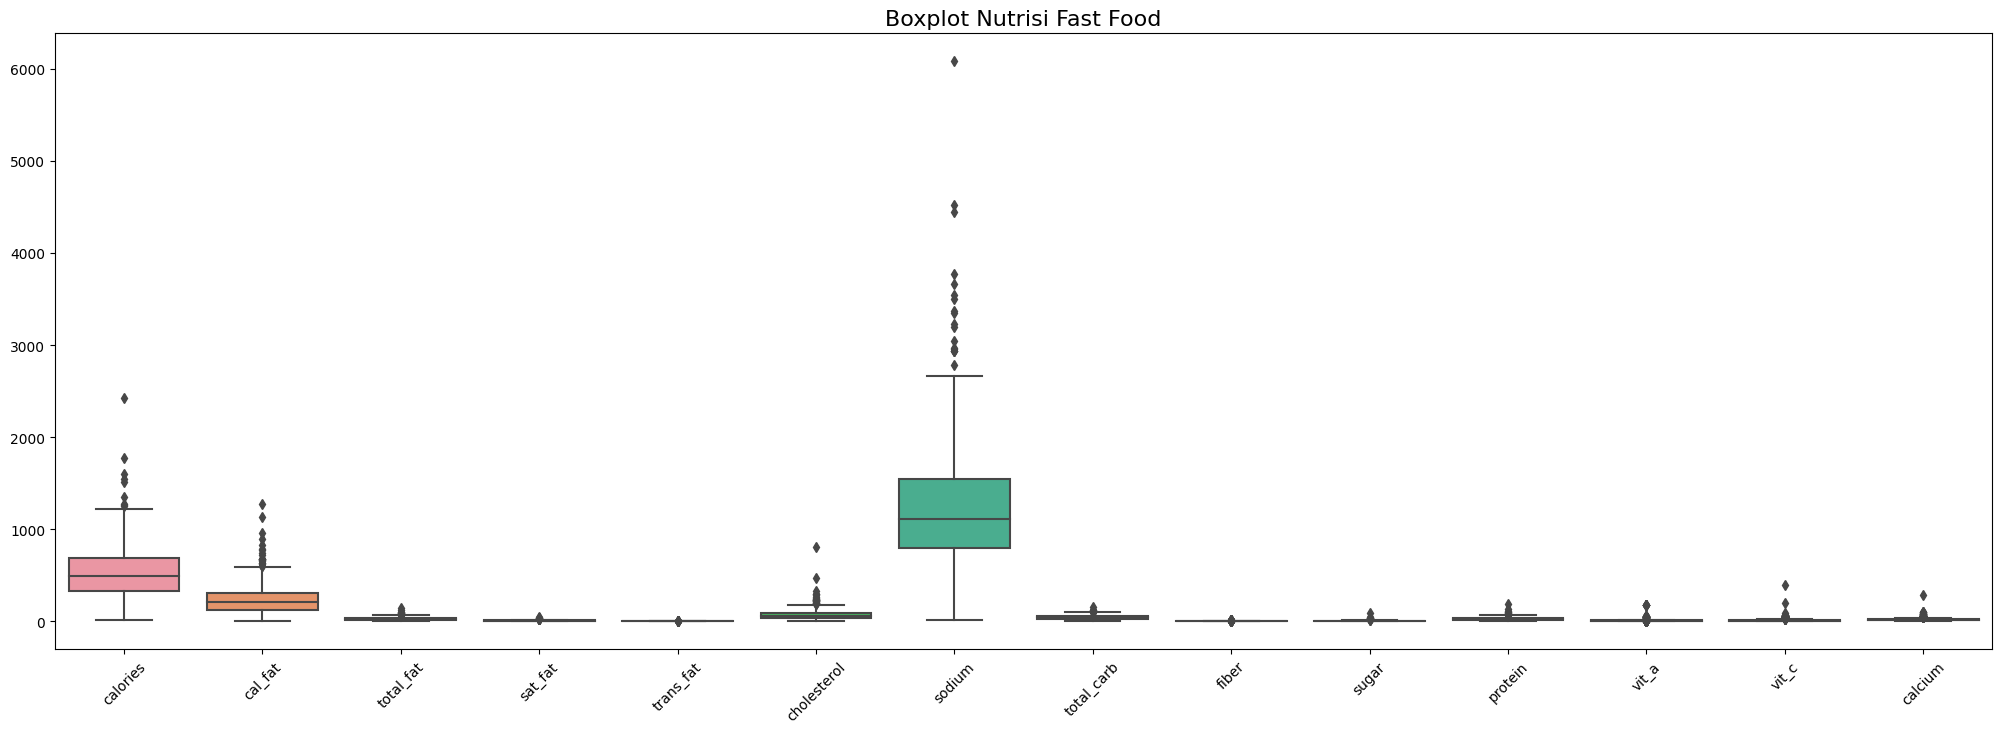

In [63]:
# Atur ukuran plot
plt.figure(figsize=(25, 8))  # Lebar 25, tinggi 8

# Plot boxplot
sns.boxplot(data=df[['calories', 'cal_fat', 'total_fat', 'sat_fat', 'trans_fat', 
                     'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar', 
                     'protein', 'vit_a', 'vit_c', 'calcium', 'salad']])

# Rotasi label di sumbu-x
plt.xticks(rotation=45)  # Atur rotasi 45 derajat atau sesuai kebutuhan

# Tambahkan judul (opsional)
plt.title("Boxplot Nutrisi Fast Food", fontsize=16)

# Tampilkan plot
plt.show()

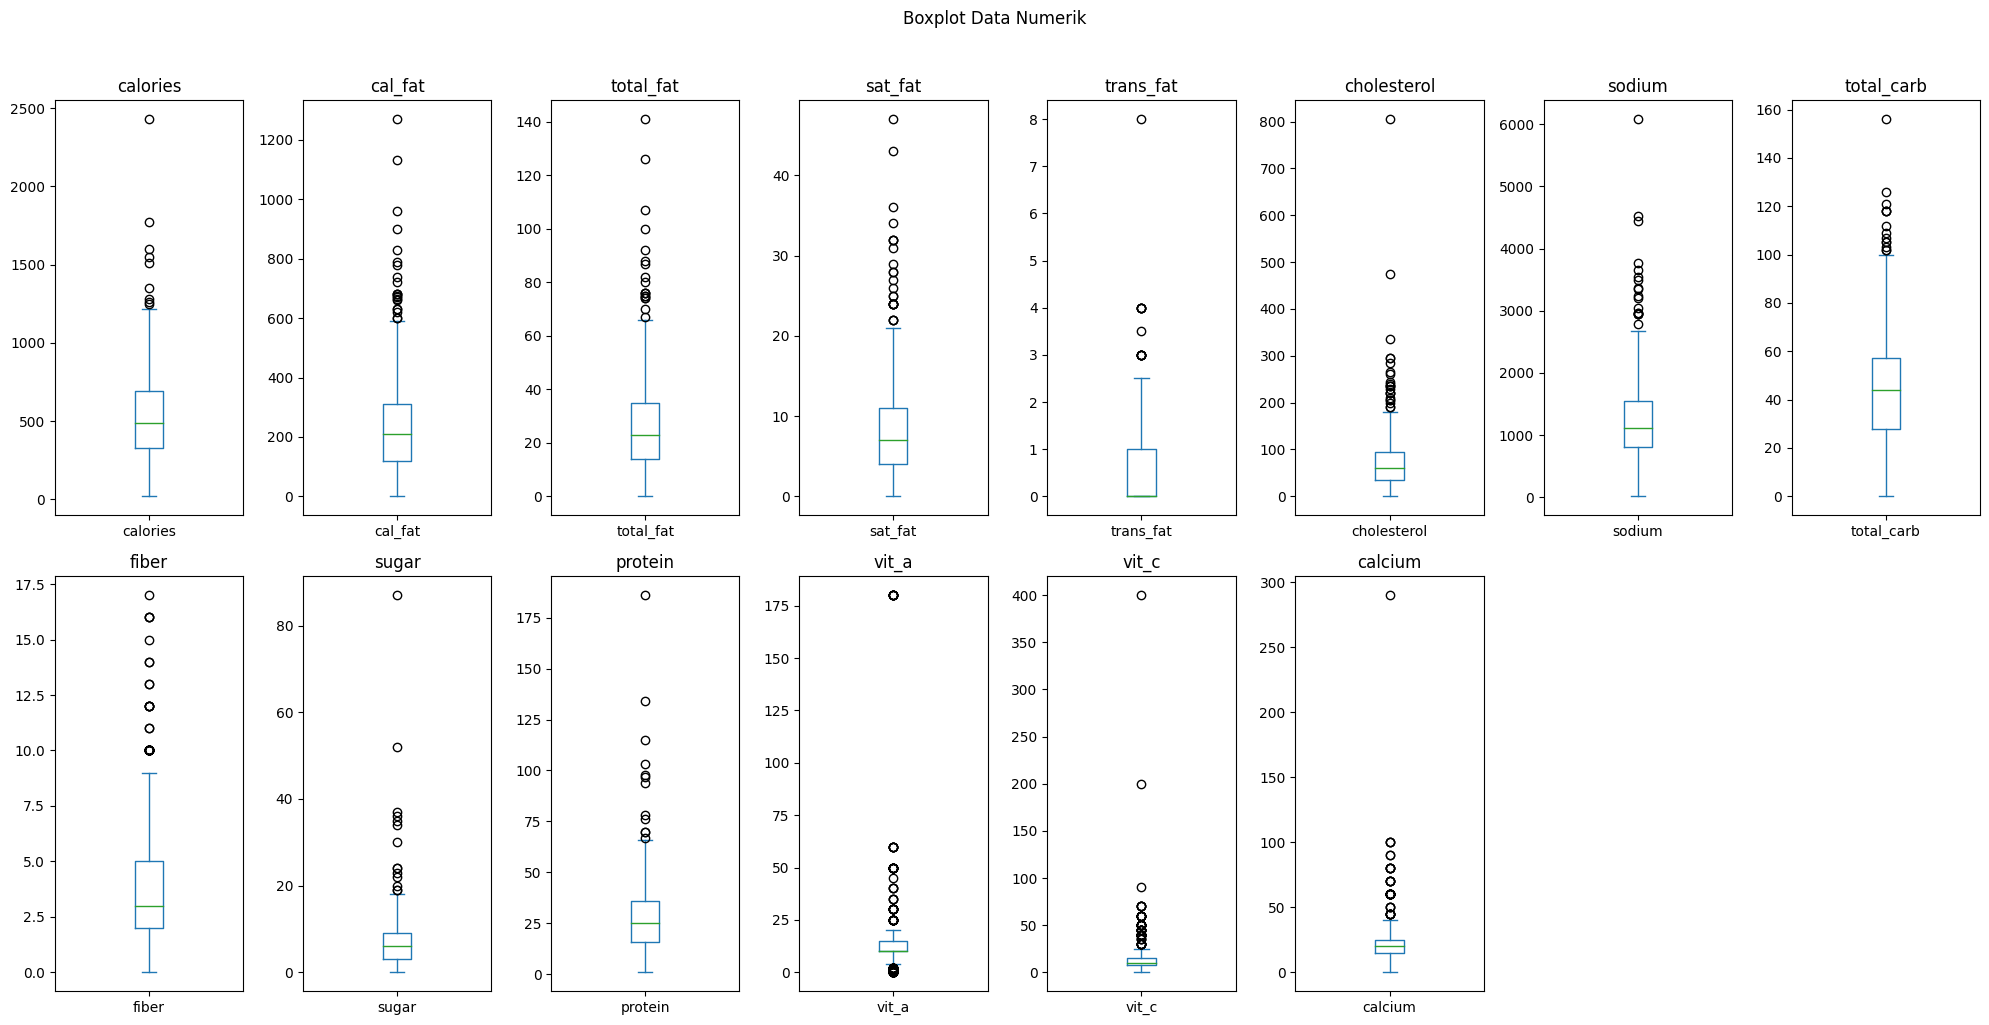

In [64]:
numeric_col = ['calories', 'cal_fat', 'total_fat', 'sat_fat', 'trans_fat', 'cholesterol', 'sodium','total_carb','fiber','sugar','protein','vit_a', 'vit_c', 'calcium'] ##fitur numerik

plt.figure(figsize=(20, 10))
for i, feature in enumerate(numeric_col, start=1):
    plt.subplot(2, 8, i)  # Ubah (3, 6) sesuai jumlah kolom
    df[feature].plot(kind='box')
    plt.title(feature)
plt.suptitle("Boxplot Data Numerik", y=1.02)  # Tambahkan judul utama
plt.tight_layout()
plt.show()


## 3.4: Tangani Outlier

In [65]:
# Pilih kolom numerik
numeric_col = df.select_dtypes(include=['number']).columns

# Hitung batas Q1, Q3, dan IQR
Q1 = df[numeric_col].quantile(0.25)
Q3 = df[numeric_col].quantile(0.75)
IQR = Q3 - Q1

# Definisikan batas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Terapkan capping
for col in numeric_col:
    df[col] = df[col].clip(lower=lower_bound[col], upper=upper_bound[col])


In [66]:

# # Fungsi Winsorizing dengan mengganti outlier dengan nilai median
# def winsorize_column(df, column, lower_percentile=1, upper_percentile=90):
#     lower_limit = df[column].quantile(lower_percentile / 100)
#     upper_limit = df[column].quantile(upper_percentile / 100)
#     median_value = df[column].median()
    
#     # Ganti nilai di bawah lower limit dan di atas upper limit dengan median
#     df[column] = df[column].apply(lambda x: median_value if x < lower_limit or x > upper_limit else x)
    
#     return df

# # Daftar kolom yang ingin di-winsorize
# columns_to_winsorize = ['calories', 'cal_fat', 'total_fat', 'sat_fat', 'cholesterol',
#                         'sodium', 'total_carb', 'fiber', 'sugar', 'protein']

# # Terapkan fungsi winsorize ke setiap kolom
# for col in columns_to_winsorize:
#     df = winsorize_column(df, col, lower_percentile=1, upper_percentile=90)


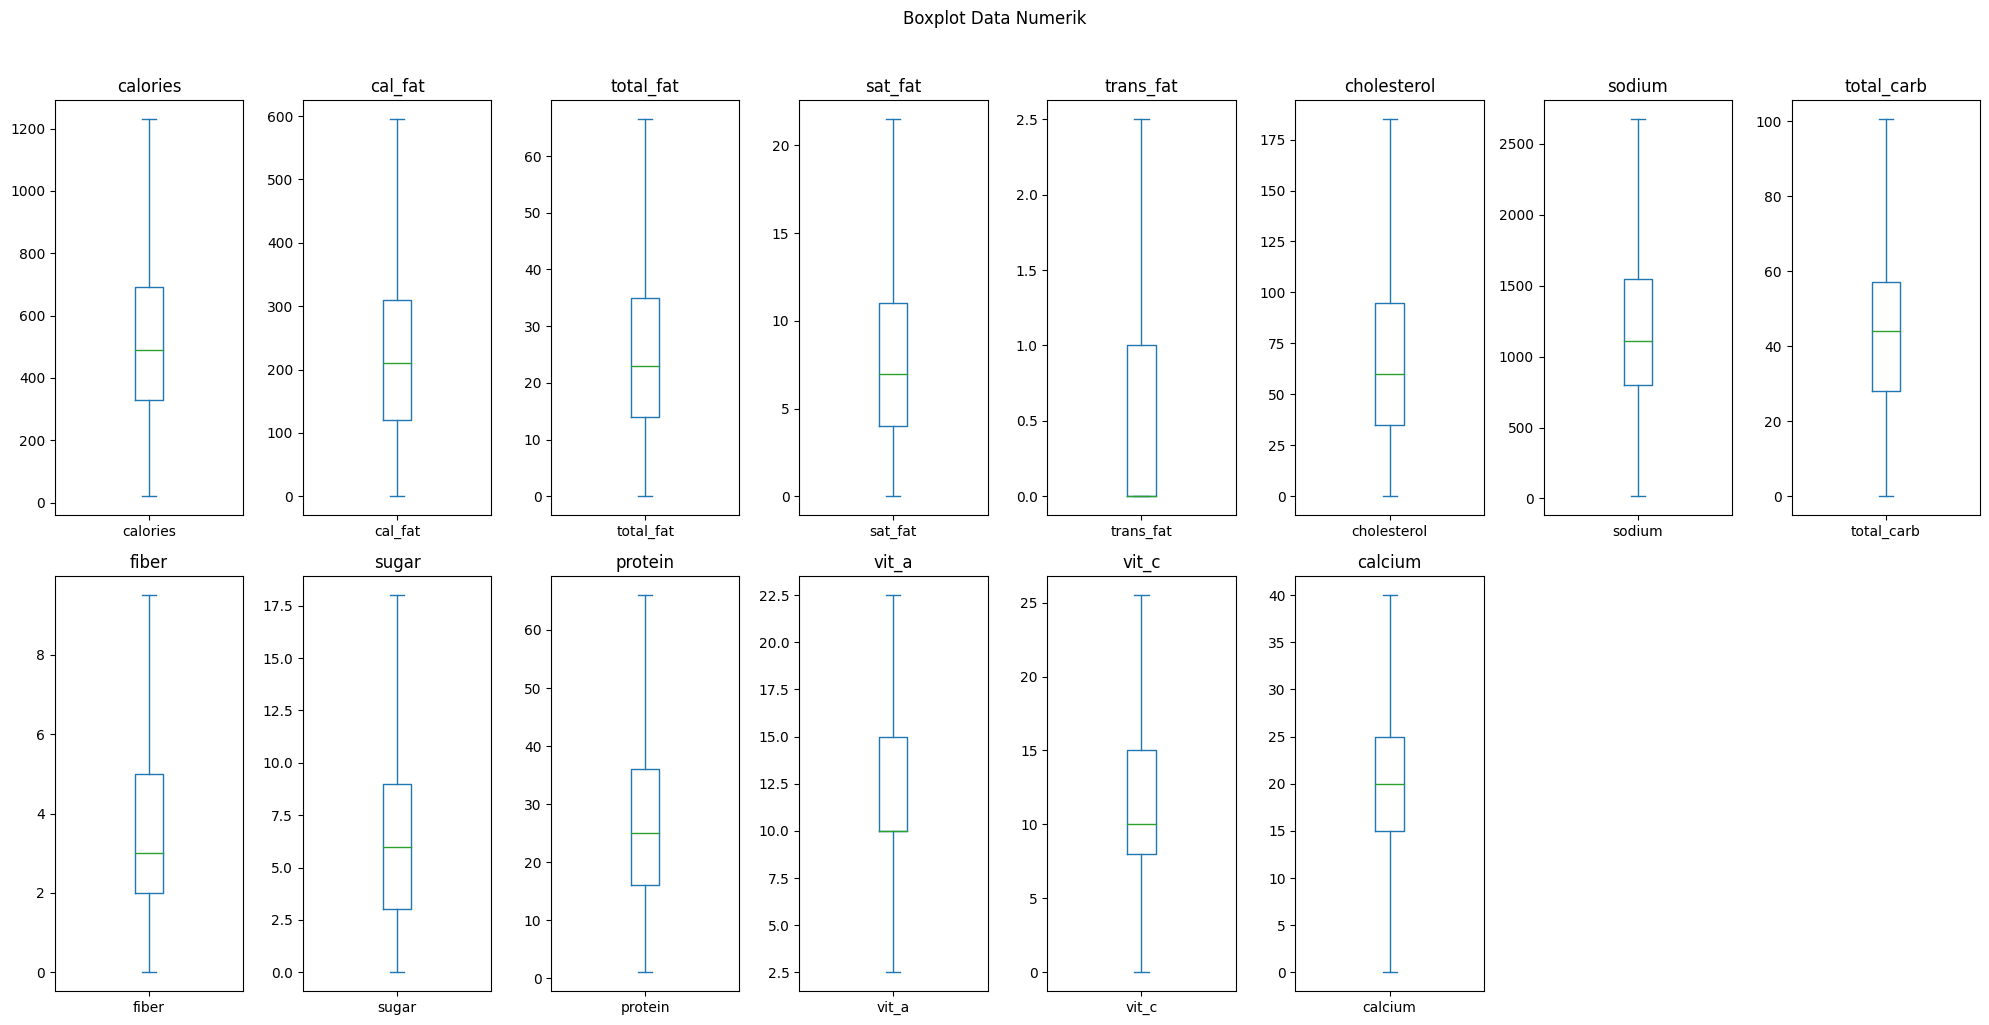

In [67]:
numeric_col = ['calories', 'cal_fat', 'total_fat', 'sat_fat', 'trans_fat', 'cholesterol', 'sodium','total_carb','fiber','sugar','protein','vit_a', 'vit_c', 'calcium'] ##fitur numerik

plt.figure(figsize=(20, 10))
for i, feature in enumerate(numeric_col, start=1):
    plt.subplot(2, 8, i)  # Ubah (3, 6) sesuai jumlah kolom
    df[feature].plot(kind='box')
    plt.title(feature)
plt.suptitle("Boxplot Data Numerik", y=1.02)  # Tambahkan judul utama
plt.tight_layout()
plt.show()


In [68]:
# # Pilih kolom untuk capping
# columns_to_cap = ['trans_fat', 'total_carb', 'fiber', 'vit_a', 'vit_c', 'calcium']

# # Hitung Q1, Q3, dan IQR untuk kolom yang ditentukan
# Q1 = df[columns_to_cap].quantile(0.25)
# Q3 = df[columns_to_cap].quantile(0.75)
# IQR = Q3 - Q1

# # Tentukan batas bawah dan atas
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Terapkan capping
# for col in columns_to_cap:
#     df[col] = df[col].clip(lower=lower_bound[col], upper=upper_bound[col])



In [69]:
# numeric_col = ['calories', 'cal_fat', 'total_fat', 'sat_fat', 'trans_fat', 'cholesterol', 'sodium','total_carb','fiber','sugar','protein','vit_a', 'vit_c', 'calcium'] ##fitur numerik

# plt.figure(figsize=(20, 10))
# for i, feature in enumerate(numeric_col, start=1):
#     plt.subplot(2, 8, i)  # Ubah (3, 6) sesuai jumlah kolom
#     df[feature].plot(kind='box')
#     plt.title(feature)
# plt.suptitle("Boxplot Data Numerik", y=1.02)  # Tambahkan judul utama
# plt.tight_layout()
# plt.show()


## 3.5: Hapus Fitur

In [70]:
# fitur yang dihapus adalah salad, cal_fat, sat_fat, trans_fat
# lemak-lemak dihapus karena di total_fat sudah mencakup trans_fat dan sat_fat, meskipun untuk nilai lemak tak jenuh tidak ada fiturnya sehingga kami gunakan saja total_fat
df.drop(['salad','cal_fat','sat_fat','trans_fat'],axis=1,inplace=True)

In [71]:
df

,restaurant,item,calories,total_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,7.0,95,1110,44.0,3.0,11,37.0,4.0,20.0,20.0
1,Mcdonalds,Single Bacon Smokehouse Burger,840,45.0,130,1580,62.0,2.0,18,46.0,6.0,20.0,20.0
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,66.5,185,1920,63.0,3.0,18,66.0,10.0,20.0,40.0
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,31.0,155,1940,62.0,2.0,18,55.0,6.0,25.0,20.0
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,45.0,120,1980,81.0,4.0,18,46.0,6.0,20.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,Taco Bell,Original Triple Double Crunchwrap,700,30.0,45,1550,85.0,9.0,7,23.0,15.0,6.0,25.0
510,Taco Bell,Spicy Triple Double Crunchwrap,780,38.0,50,1850,87.0,9.0,8,23.0,20.0,10.0,25.0
512,Taco Bell,Fiesta Taco Salad-Beef,780,42.0,60,1340,74.0,9.5,7,26.0,10.0,10.0,20.0
513,Taco Bell,Fiesta Taco Salad-Chicken,720,35.0,70,1260,70.0,8.0,8,32.0,10.0,10.0,20.0


## 3.6: Normalisasi

In [72]:
# Identifikasi kolom numerik
numerical_columns = ['calories', 'total_fat', 'cholesterol', 'sodium', 
                     'total_carb', 'fiber', 'sugar', 'protein', 
                     'vit_a', 'vit_c', 'calcium']

# Normalisasi dengan Min-Max Scaler
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Tampilkan hasil
df

,restaurant,item,calories,total_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
0,Mcdonalds,Artisan Grilled Chicken Sandwich,0.297521,0.105263,0.513514,0.411654,0.437811,0.315789,0.611111,0.553846,0.075,0.784314,0.500
1,Mcdonalds,Single Bacon Smokehouse Burger,0.677686,0.676692,0.702703,0.588346,0.616915,0.210526,1.000000,0.692308,0.175,0.784314,0.500
2,Mcdonalds,Double Bacon Smokehouse Burger,0.917355,1.000000,1.000000,0.716165,0.626866,0.315789,1.000000,1.000000,0.375,0.784314,1.000
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,0.603306,0.466165,0.837838,0.723684,0.616915,0.210526,1.000000,0.830769,0.175,0.980392,0.500
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,0.743802,0.676692,0.648649,0.738722,0.805970,0.421053,1.000000,0.692308,0.175,0.784314,0.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,Taco Bell,Original Triple Double Crunchwrap,0.561983,0.451128,0.243243,0.577068,0.845771,0.947368,0.388889,0.338462,0.625,0.235294,0.625
510,Taco Bell,Spicy Triple Double Crunchwrap,0.628099,0.571429,0.270270,0.689850,0.865672,0.947368,0.444444,0.338462,0.875,0.392157,0.625
512,Taco Bell,Fiesta Taco Salad-Beef,0.628099,0.631579,0.324324,0.498120,0.736318,1.000000,0.388889,0.384615,0.375,0.392157,0.500
513,Taco Bell,Fiesta Taco Salad-Chicken,0.578512,0.526316,0.378378,0.468045,0.696517,0.842105,0.444444,0.476923,0.375,0.392157,0.500


# 4: Exploratory Data Analysis (EDA)

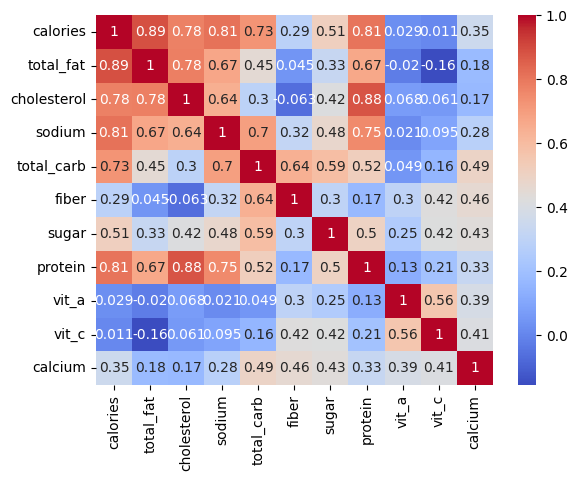

In [73]:
numeric_df = df.select_dtypes(include=['number'])  # Pilih hanya kolom numerik
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

# 5: Principal Component Analysis (PCA)

## 5.1: Hitung variansi

Explained variance ratio per component: [0.74152737 0.14687824 0.06379322 0.03397201 0.0097498  0.00407935]


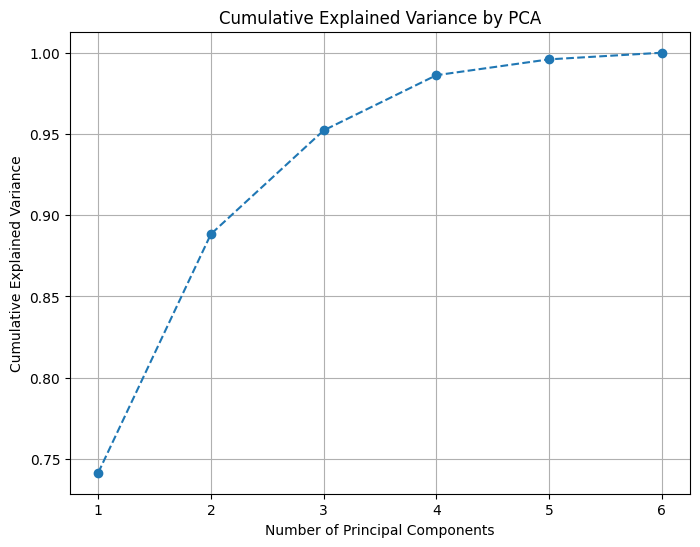

In [74]:
# Pilih fitur yang akan digunakan
selected_features = ['total_fat', 'cholesterol', 'sodium', 'total_carb', 'protein', 'calories']

data_normalized = df[selected_features]

# Terapkan PCA
pca = PCA()
pca_components = pca.fit_transform(data_normalized)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio per component: {explained_variance}")

# Plot Cumulative Explained Variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA')
plt.grid()
plt.show()

## 5.2: PCA untuk 2 komponen

In [75]:
# Pilih 3 komponen utama
pca_3 = PCA(n_components=2)
data_pca_3 = pca_3.fit_transform(data_normalized)

# Simpan hasil PCA ke DataFrame
pca_df_3 = pd.DataFrame(data_pca_3, columns=['PC1', 'PC2'])
print(pca_df_3.head())

# # Visualisasi 3D scatter plot (opsional)
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(pca_df_3['PC1'], pca_df_3['PC2'], pca_df_3['PC3'], alpha=0.7, s=50)
# ax.set_xlabel('PC1')
# ax.set_ylabel('PC2')
# ax.set_zlabel('PC3')
# plt.title('PCA Projection with 3 Components')
# plt.show()



        PC1       PC2
0 -0.072502  0.063080
1  0.608545  0.104071
2  1.159782  0.325814
3  0.653818  0.123964
4  0.738123 -0.109526


## 5.3: Gabungkan PCA dengan fitur lain

In [76]:
features_additional = ['fiber', 'sugar', 'vit_a', 'vit_c', 'calcium']
data_combined = pd.concat([pca_df_3, df[features_additional]], axis=1)

In [77]:
data_combined

,PC1,PC2,fiber,sugar,vit_a,vit_c,calcium
0,-0.072502,0.063080,0.315789,0.611111,0.075,0.784314,0.500
1,0.608545,0.104071,0.210526,1.000000,0.175,0.784314,0.500
2,1.159782,0.325814,0.315789,1.000000,0.375,0.784314,1.000
3,0.653818,0.123964,0.210526,1.000000,0.175,0.980392,0.500
4,0.738123,-0.109526,0.421053,1.000000,0.175,0.784314,0.500
...,...,...,...,...,...,...,...
510,0.283986,-0.220009,0.947368,0.444444,0.875,0.392157,0.625
511,0.252170,-0.159028,NaN,NaN,NaN,NaN,NaN
512,0.210864,-0.214537,1.000000,0.388889,0.375,0.392157,0.500
513,NaN,NaN,0.842105,0.444444,0.375,0.392157,0.500


In [78]:
print(data_combined.isnull().sum())  # Periksa jika ada nilai NaN

PC1        2
PC2        2
fiber      2
sugar      2
vit_a      2
vit_c      2
calcium    2
dtype: int64


In [79]:
print(pca_df_3.index)  # Indeks hasil PCA

RangeIndex(start=0, stop=513, step=1)


In [80]:
print(df[features_additional].index)  # Indeks fitur tambahan

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       504, 505, 506, 507, 508, 509, 510, 512, 513, 514],
      dtype='int64', length=513)


In [81]:
# Reset indeks pada kedua DataFrame / Sinkronkan
pca_df_3 = pca_df_3.reset_index(drop=True)
df_additional_features = df[features_additional].reset_index(drop=True)

# Gabungkan dataset
data_combined = pd.concat([pca_df_3, df_additional_features], axis=1)
print(data_combined.isnull().sum())  # Periksa jika ada nilai NaN


PC1        0
PC2        0
fiber      0
sugar      0
vit_a      0
vit_c      0
calcium    0
dtype: int64


# 5: Clustering

## 5.1: Elbow Method

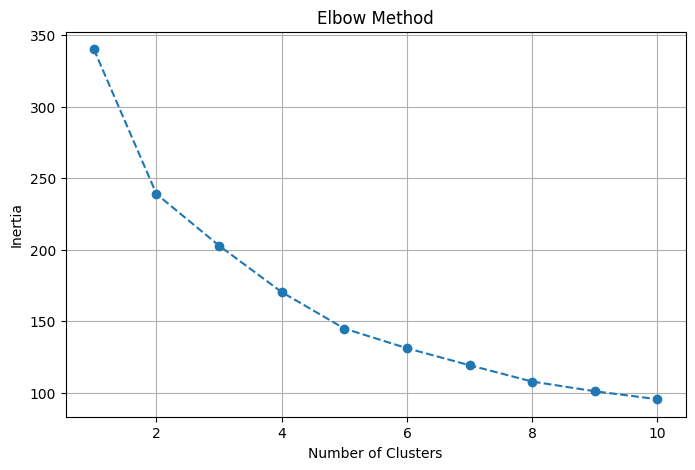

In [82]:
# Cek jumlah cluster optimal dengan Elbow Method
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_combined)
    inertia.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

## 5.2: K-Means Clustering

In [83]:
# Pilih jumlah cluster optimal berdasarkan Elbow Method (misalnya k=2)
k_optimal = 4  # Ganti dengan jumlah cluster yang ditemukan
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(data_combined)

# Tambahkan hasil cluster ke DataFrame
data_combined['Cluster'] = clusters

## 5.3: Silhouette Score

In [84]:
# Hitung silhouette score
silhouette_avg = silhouette_score(data_combined, data_combined['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.5290


## 5.4: Analisis Hasil Clustering 

Cluster
0    253
2    127
1     90
3     43
Name: count, dtype: int64


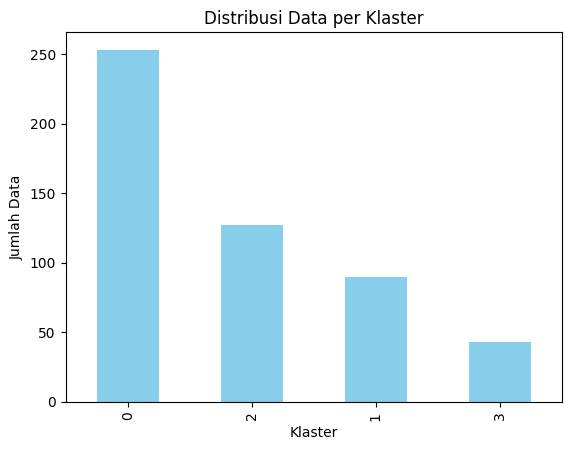

In [85]:
# Distribusi jumlah data per klaster
cluster_counts = data_combined['Cluster'].value_counts()
print(cluster_counts)

# Visualisasi distribusi klaster
import matplotlib.pyplot as plt

cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Distribusi Data per Klaster')
plt.xlabel('Klaster')
plt.ylabel('Jumlah Data')
plt.show()

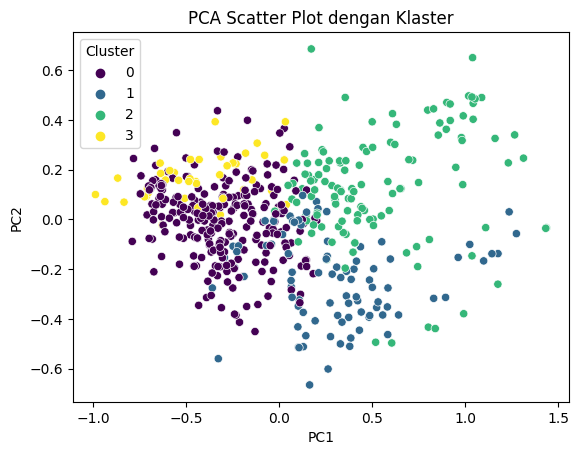

In [86]:
sns.scatterplot(data=data_combined, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('PCA Scatter Plot dengan Klaster')
plt.show()

In [87]:
# Profilisasi klaster
for cluster in sorted(data_combined['Cluster'].unique()):
    print(f"Profil Klaster {cluster}")
    print(data_combined[data_combined['Cluster'] == cluster].describe())
    print("\n")


Profil Klaster 0
              PC1         PC2       fiber       sugar       vit_a       vit_c  \
count  253.000000  253.000000  253.000000  253.000000  253.000000  253.000000   
mean    -0.308686   -0.007129    0.332016    0.236495    0.292194    0.320158   
std      0.233948    0.154039    0.231418    0.176943    0.175455    0.192837   
min     -0.791106   -0.450916    0.000000    0.000000    0.000000    0.000000   
25%     -0.465528   -0.094983    0.210526    0.111111    0.175000    0.156863   
50%     -0.319132    0.014130    0.315789    0.222222    0.375000    0.392157   
75%     -0.142256    0.089359    0.421053    0.333333    0.375000    0.392157   
max      0.200783    0.437004    1.000000    1.000000    0.875000    1.000000   

          calcium  Cluster  
count  253.000000    253.0  
mean     0.413538      0.0  
std      0.204080      0.0  
min      0.000000      0.0  
25%      0.250000      0.0  
50%      0.500000      0.0  
75%      0.500000      0.0  
max      0.875000    

In [88]:
# Hanya fitur yang digunakan untuk PCA
df_pca = df[['total_fat', 'cholesterol', 'sodium', 'total_carb', 'protein', 'calories']]

# Lakukan PCA
pca = PCA(n_components=2)
pca_values = pca.fit_transform(df_pca)

# Balik PCA ke nilai asli
pca_original = pca.inverse_transform(data_combined[['PC1', 'PC2']])


# Buat DataFrame untuk fitur asli yang direkonstruksi
pca_original_df = pd.DataFrame(pca_original, columns=['total_fat', 'cholesterol', 'sodium', 
                                                      'total_carb', 'protein', 'calories'])

# Gabungkan dengan fitur lain dan label kluster
data_reconstructed = pd.concat([pca_original_df, 
                                data_combined[['fiber', 'sugar', 'vit_a', 'vit_c', 'calcium', 'Cluster']]], 
                               axis=1)



In [89]:
# Rata-rata fitur asli untuk tiap klaster
cluster_summary = data_reconstructed.groupby('Cluster').mean()
print("Rata-rata Fitur Tiap Klaster:")
print(cluster_summary)

# Statistik deskriptif mendetail
cluster_description = data_reconstructed.groupby('Cluster').describe()
print("Deskripsi Statistik Tiap Klaster:")
print(cluster_description)


Rata-rata Fitur Tiap Klaster:
         total_fat  cholesterol    sodium  total_carb   protein  calories  \
Cluster                                                                     
0         0.253787     0.234243  0.330058    0.351470  0.275581  0.284957   
1         0.465316     0.376657  0.627958    0.737712  0.484445  0.566953   
2         0.652182     0.669067  0.638462    0.532466  0.642808  0.639837   
3         0.250478     0.279718  0.253054    0.188965  0.264827  0.230086   

            fiber     sugar     vit_a     vit_c   calcium  
Cluster                                                    
0        0.332016  0.236495  0.292194  0.320158  0.413538  
1        0.774269  0.612963  0.607500  0.725926  0.836111  
2        0.323663  0.518810  0.380118  0.383356  0.526378  
3        0.427173  0.342377  1.000000  0.961696  0.329070  
Deskripsi Statistik Tiap Klaster:
        total_fat                                                              \
            count      mean     

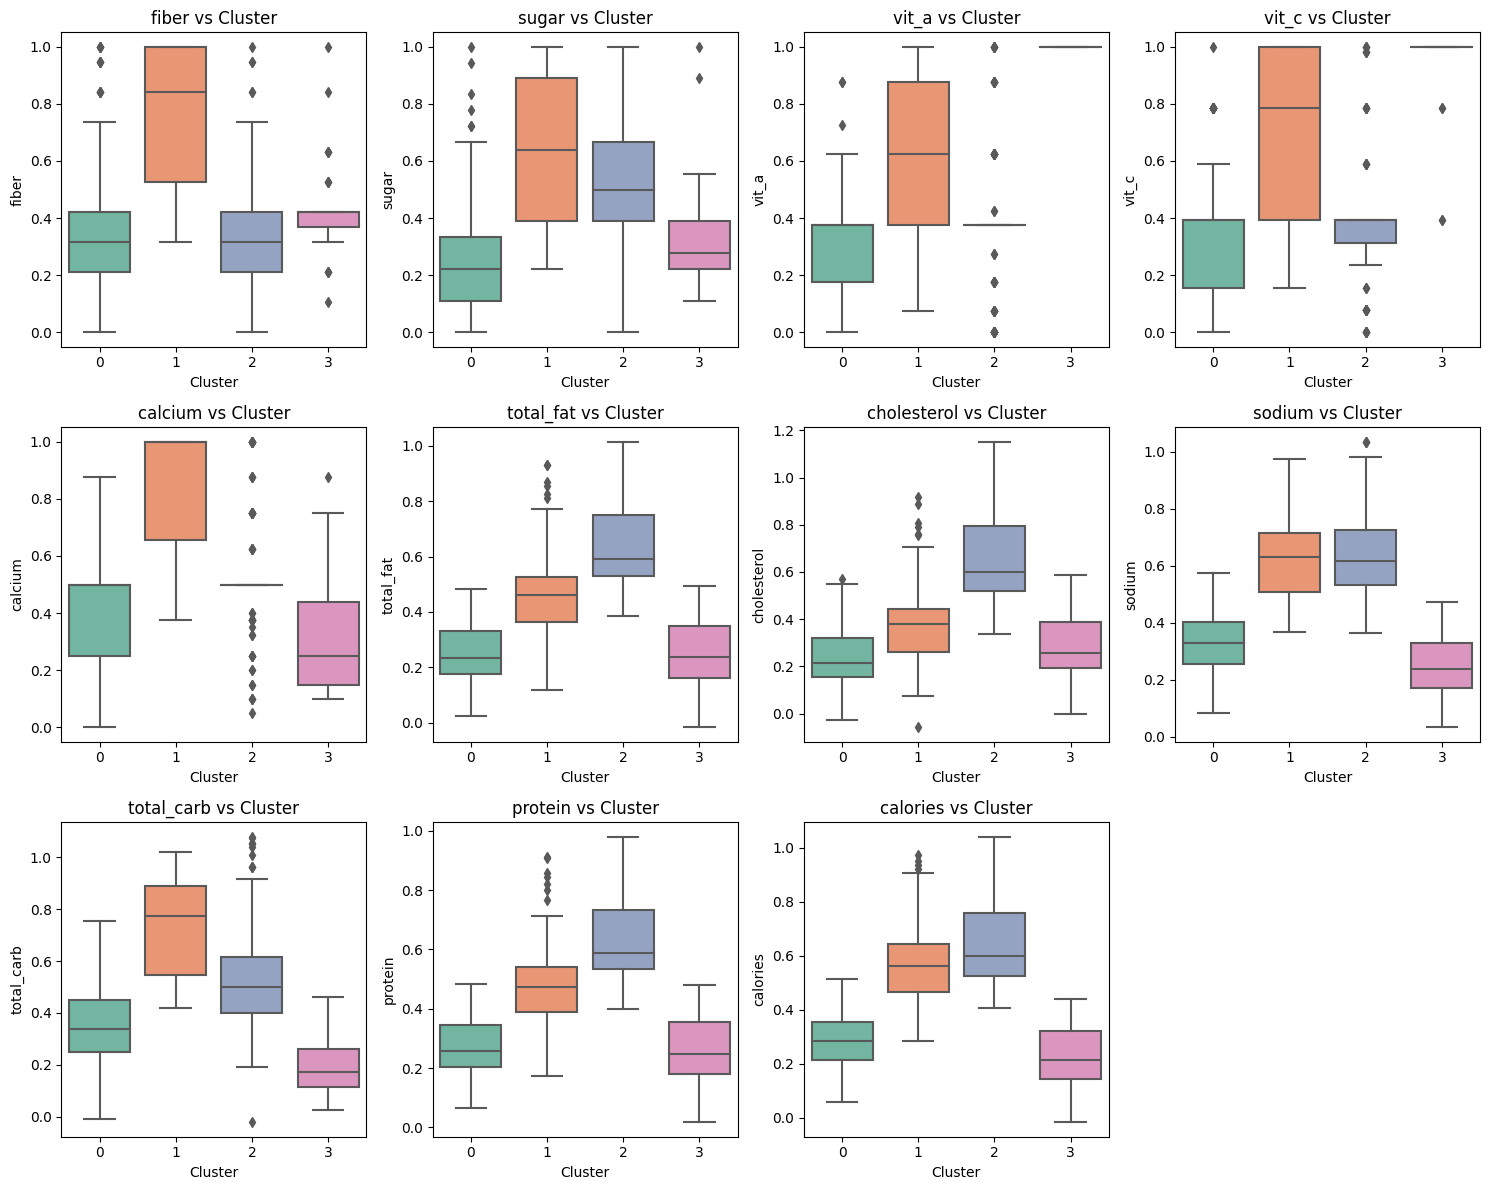

In [90]:
# Boxplot fitur terhadap cluster
features = ['fiber', 'sugar', 'vit_a', 'vit_c', 'calcium', 
            'total_fat', 'cholesterol', 'sodium', 'total_carb', 'protein', 'calories']

plt.figure(figsize=(15, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)  # Adjusted layout to accommodate more features
    sns.boxplot(x='Cluster', y=feature, data=data_reconstructed, palette='Set2')
    plt.title(f'{feature} vs Cluster')

plt.tight_layout()
plt.show()


In [91]:
# Gabungkan df dan data_reconstructed berdasarkan indeks
merged_data = df.copy()
merged_data['Cluster'] = data_reconstructed['Cluster']

In [92]:
merged_data[merged_data['Cluster'] == 0].sample(5)

,restaurant,item,calories,total_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,Cluster
71,Chick Fil-A,Chicken Sandwich,0.347107,0.285714,0.324324,0.501880,0.398010,0.210526,0.277778,0.415385,0.000,0.156863,0.375,0.0
296,Dairy Queen,Crispy Chicken Sandwich,0.479339,0.451128,0.297297,0.464286,0.587065,0.736842,0.444444,0.353846,0.375,0.235294,0.375,0.0
119,Sonic,Large Spicy Jumbo Popcorn Chicken,0.487603,0.451128,0.432432,0.558271,0.507463,0.315789,0.000000,0.538462,0.725,0.000000,0.075,0.0
130,Sonic,"All Beef Chili Cheese Coney – 6""",0.322314,0.390977,0.351351,0.422932,0.298507,0.210526,0.222222,0.246154,0.375,0.078431,0.500,0.0
19,Mcdonalds,McChicken,0.272727,0.225564,0.216216,0.219925,0.398010,0.210526,0.277778,0.215385,0.000,0.078431,0.100,0.0


In [93]:
merged_data[merged_data['Cluster'] == 1].sample(5)

,restaurant,item,calories,total_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,Cluster
310,Subway,"6"" Big Philly Cheesesteak",0.396694,0.255639,0.459459,0.486842,0.507463,0.631579,0.444444,0.569231,0.625,0.784314,1.000,1.0
164,Arbys,Reuben Sandwich,0.545455,0.466165,0.432432,0.904135,0.616915,0.421053,0.277778,0.553846,0.175,0.784314,0.875,1.0
314,Subway,Footlong Black Forest Ham,0.462810,0.150376,0.216216,0.618421,0.915423,1.000000,0.888889,0.538462,0.675,1.000000,1.000,1.0
322,Subway,Footlong Chicken Pizziola Melt,0.743802,0.481203,0.864865,0.851504,0.975124,1.000000,1.000000,0.969231,1.000,1.000000,1.000,1.0
399,Subway,Sausage Pizza,0.661157,0.511278,0.378378,0.528195,0.965174,0.421053,0.444444,0.584615,1.000,0.156863,1.000,1.0


In [94]:
merged_data[merged_data['Cluster'] == 2].sample(5)

,restaurant,item,calories,total_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,Cluster
158,Arbys,Loaded Italian Sandwich,0.545455,0.601504,0.540541,0.847744,0.487562,0.315789,0.388889,0.476923,0.375,0.392157,0.5,2.0
37,Mcdonalds,10 piece Buttermilk Crispy Chicken Tenders,0.983471,1.000000,1.000000,1.000000,0.517413,0.105263,0.222222,1.000000,0.000,0.000000,0.1,2.0
222,Burger King,Bacon Cheddar Ranch Chicken Salad w/ grilled C...,0.471074,0.601504,0.810811,0.573308,0.179104,0.315789,0.333333,0.630769,0.375,0.392157,0.5,2.0
172,Arbys,Smokehouse Brisket,0.479339,0.526316,0.594595,0.460526,0.417910,0.210526,0.388889,0.492308,0.075,0.313725,0.5,2.0
99,Sonic,Super Sonic Double Cheeseburger W/ Mustard,0.909091,1.000000,1.000000,0.577068,0.437811,0.210526,0.444444,0.953846,0.625,0.313725,1.0,2.0


In [95]:
merged_data[merged_data['Cluster'] == 3].sample(5)

,restaurant,item,calories,total_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,Cluster
381,Subway,Meatball Marinara Salad,0.239669,0.255639,0.162162,0.265038,0.248756,0.631579,0.555556,0.230769,1.0,1.000000,0.250,3.0
376,Subway,Chicken & Bacon Ranch Melt Salad (includes Ran...,0.404959,0.571429,0.540541,0.385338,0.139303,0.421053,0.388889,0.446154,1.0,1.000000,0.750,3.0
379,Subway,Italian B.M.T.® Salad,0.173554,0.225564,0.243243,0.392857,0.119403,0.421053,0.333333,0.200000,1.0,1.000000,0.150,3.0
188,Arbys,Crispy Chicken Farmhouse Salad,0.338843,0.360902,0.351351,0.370301,0.258706,0.421053,0.222222,0.415385,1.0,0.784314,0.625,3.0
369,Subway,B.L.T. Salad,0.107438,0.120301,0.108108,0.152256,0.099502,0.421053,0.277778,0.138462,1.0,1.000000,0.150,3.0


### Hasil Clustering

**Cluster 0: "Everyday Meals"**

Karakteristik:

Calories (0.285), Sodium (0.330), Total Fat (0.254): Relatif rendah, menunjukkan makanan ini cocok untuk mereka yang ingin menjaga asupan kalori dan lemak tanpa terlalu membatasi.

Fiber (0.332): Moderat, mendukung kesehatan pencernaan.

Protein (0.276): Cukup baik untuk memenuhi kebutuhan protein dasar.

Vitamin A dan C (0.292, 0.320): Sedang, cocok untuk kebutuhan nutrisi standar.

Calcium (0.414): Moderat, mendukung kesehatan tulang.


Alasan Nama: Makanan di cluster ini cocok untuk konsumen yang menginginkan makanan dengan komposisi nutrisi yang seimbang tetapi tidak terlalu rendah atau tinggi dalam satu aspek.



---

**Cluster 1: "Energy Booster"**

Karakteristik:

Calories (0.567), Sodium (0.628), Total Carb (0.738): Tinggi, menunjukkan makanan ini kaya kalori dan karbohidrat, cocok untuk mereka yang membutuhkan energi lebih banyak.

Fiber (0.774): Sangat tinggi, mendukung kesehatan pencernaan dengan sangat baik.

Sugar (0.613): Tinggi, cocok untuk konsumen yang menyukai makanan manis.

Vitamin C dan Calcium (0.726, 0.836): Tinggi, mendukung kesehatan secara keseluruhan.

Protein (0.484): Tinggi, cocok untuk memenuhi kebutuhan protein lebih tinggi.


Alasan Nama: Makanan dalam cluster ini cocok untuk mereka yang membutuhkan asupan energi dan nutrisi lebih tinggi, seperti atlet atau individu dengan kebutuhan kalori tinggi.



---

**Cluster 2: "Protein-Rich Meals"**

Karakteristik:

Total Fat (0.652), Cholesterol (0.669), Protein (0.643): Tinggi, menunjukkan makanan ini cocok untuk diet yang fokus pada lemak dan protein, seperti diet keto.

Calories (0.640): Tinggi, mendukung kebutuhan energi.

Fiber dan Sugar (0.324, 0.519): Moderat.

Calcium (0.526): Sedang, cukup mendukung kebutuhan tulang.


Alasan Nama: Makanan ini cocok untuk konsumen yang fokus pada asupan protein dan lemak tinggi, seperti mereka yang menjalani pola makan tinggi lemak untuk kebutuhan tertentu.



---

**Cluster 3: "Low-Calorie Meals"**

Karakteristik:

Calories (0.230), Total Fat (0.250), Sodium (0.253): Rendah, menunjukkan makanan ini cocok untuk mereka yang ingin menjaga berat badan atau memilih makanan rendah kalori.

Vitamin A dan C (1.000, 0.962): Sangat tinggi, mendukung kebutuhan mikronutrien.

Fiber (0.427): Moderat.

Protein (0.265): Relatif rendah.

Calcium (0.329): Rendah.


Alasan Nama: Cluster ini cocok untuk makanan rendah kalori tetapi tinggi mikronutrien, cocok untuk konsumen yang memprioritaskan vitamin dalam pola makan mereka, seperti mereka yang ingin meningkatkan asupan vitamin tanpa meningkatkan kalori.



---


# 6: Simpan Model

In [96]:
from sklearn.decomposition import PCA
import joblib

# Misalnya, pca adalah objek PCA yang telah dilatih
joblib.dump(pca_3, 'pca_model.pkl')
joblib.dump(kmeans, 'kmeans_model.pkl')


['kmeans_model.pkl']